In [65]:
# Import libraries
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data from the csv file with no header
data = pd.read_csv('./6-4.csv')

# Fill the missing values with 0
data = data.fillna(0)

# Display the first five rows of the data
data.head(12)

,DO-1,DF-1,DO-2,DF-2,Group
0,12,11,7,6,G1
1,11,7,6,8,G1
2,9,8,8,7,G1
3,9,9,7,6,G1
4,13,5,6,5,G1
5,6,6,5,9,G1
6,7,7,8,8,G2
7,9,8,8,5,G2
8,8,8,9,7,G2
9,7,8,9,5,G2


In [66]:
# Convert the 'Time' column to numeric and set any invalid values to 0
data_melt = pd.melt(data, id_vars=['Group'], value_vars=['DO-1', 'DF-1','DO-2','DF-2'], var_name='Method', value_name='Time')

data.head(12)


,DO-1,DF-1,DO-2,DF-2,Group
0,12,11,7,6,G1
1,11,7,6,8,G1
2,9,8,8,7,G1
3,9,9,7,6,G1
4,13,5,6,5,G1
5,6,6,5,9,G1
6,7,7,8,8,G2
7,9,8,8,5,G2
8,8,8,9,7,G2
9,7,8,9,5,G2


In [67]:
# Perform a two-way ANOVA on the reshaped data
model = ols('Time ~ Group + Method + Group:Method', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_table


,sum_sq,df,F,PR(>F)
Group,4.083333,1.0,1.195122,0.280839
Method,36.416667,3.0,3.552846,0.022663
Group:Method,12.750000,3.0,1.243902,0.306578
Residual,136.666667,40.0,NaN,NaN


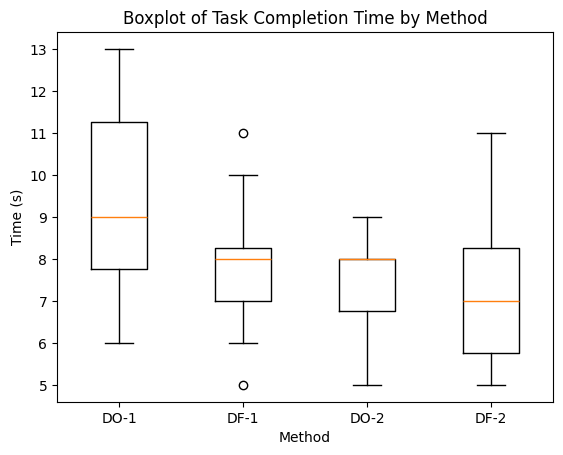

In [70]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create a boxplot of the task completion time by method
plt.boxplot([data_melt[data_melt['Method'] == 'DO-1']['Time'],
             data_melt[data_melt['Method'] == 'DF-1']['Time'],
             data_melt[data_melt['Method'] == 'DO-2']['Time'],
             data_melt[data_melt['Method'] == 'DF-2']['Time']],
            labels=['DO-1', 'DF-1', 'DO-2', 'DF-2'])

# Add a title and axis labels
plt.title('Boxplot of Task Completion Time by Method')
plt.xlabel('Method')
plt.ylabel('Time (s)')

# Show the plot
plt.show()
